## Importamos todas las librerias que vamos a necesitar para nuestro EDA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import spearmanr



## leemos el archivo de salarios y creamos el DataFrame.

In [2]:
df = pd.read_csv("ds_salaries.csv")
df = pd.DataFrame(df)


In [3]:
# realizo una copia
df1 = df.copy()

## Vemos y analizamos la informacion que contiene cada columna. Primero realizamos un .info() y luego vemos los valores de las columnas


In [4]:
# Información de cada columna.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [5]:
# creamos una funcion que nos permite conocer las categorias de cada una de las columnas y sus valores.

def info_columnas(df):
    """
    Esta funcion genera un resumen de cada columna del DataFrame df, mostrando los diferentes 
    valores y su frecuencia.

    parametros (df)
    """
    for columna in df.columns:
        print(f"Resumen de la columna '{columna}':")
        print(df[columna].value_counts())
        print("============================================")

In [6]:
#aplicamos la funcion recien creada.
info_columnas(df)

Resumen de la columna 'work_year':
2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64
Resumen de la columna 'experience_level':
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
Resumen de la columna 'employment_type':
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
Resumen de la columna 'job_title':
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
Resumen de la columna 'salary':
100000    112
150000    100
120000     99
1600

## Limpieza DF

In [7]:
#Eliminamos las columnas de Salary y Salaty_currency ya que realizaremos el análisis en base al salario en dolares.

df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)

In [8]:
# Verificamos si tenemos valores nulos.

df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# para poder renombrar los paises con sus nombres completos, leemos y realizamos los cambios con el archivo paises.

# DataFrame de paises desde el archivo CSV
df_nombre_paises = pd.read_csv("paises.csv")

# Columnnas que son de mi interes
df_nombre_paises1 = df_nombre_paises[[' name',' iso2','continente']]
# Merge para agregar la columna 'employee_residence_c'
df = df.merge(df_nombre_paises1, left_on='employee_residence', right_on=' iso2', how='left')


In [10]:
#Renombro columnas y elimino las que no necesito

df.rename(columns={' name': 'employee_residence_c','continente':'employee_continent'}, inplace=True)
df.drop(columns=['employee_residence',' iso2'], inplace=True)


In [11]:
# Realizo el mismo proceso con company_location
df = df.merge(df_nombre_paises1, left_on='company_location', right_on=' iso2', how='left')

In [12]:
df.rename(columns={' name': 'company_location_c', 'continente':'company_location_continent'}, inplace=True)
df.drop(columns=['company_location',' iso2'], inplace=True)


In [13]:
# Convertir la columna "work_year" a formato de fecha
df["work_year"] = pd.to_datetime(df["work_year"], format="%Y").dt.year


In [15]:
# Primero creamos un diccionario con sus llaves en 2 caracteres y sus valores en nombre completo
# luego hacemos un replace


reemplazos1 = {
    'SE': 'Senior',
    'MI': 'Mid-level',
    'EN': 'Entry-level',
    'EX': 'Executive'
}

reemplazos2 = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

reemplazos3 = {
    0:"in company",
    50: "hibrido",
    100: "remote" 
}

df['experience_level'] = df['experience_level'].replace(reemplazos1)
df['employment_type'] = df['employment_type'].replace(reemplazos2)
df['remote_ratio'] = df['remote_ratio'].replace(reemplazos3)




In [16]:
# Función lambda para verificar si el empleado reside en el mismo país donde trabaja
df["reside_en_mismo_pais"] = df.apply(lambda row: "Sí" if row["employee_residence_c"] == row["company_location_c"] else "No", axis=1)



In [17]:
# informacion sobre el DF

print(df.info())

print(df.shape)

print(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   work_year                   3755 non-null   int64 
 1   experience_level            3755 non-null   object
 2   employment_type             3755 non-null   object
 3   job_title                   3755 non-null   object
 4   salary_in_usd               3755 non-null   int64 
 5   remote_ratio                3755 non-null   object
 6   company_size                3755 non-null   object
 7   employee_residence_c        3755 non-null   object
 8   employee_continent          3755 non-null   object
 9   company_location_c          3755 non-null   object
 10  company_location_continent  3755 non-null   object
 11  reside_en_mismo_pais        3755 non-null   object
dtypes: int64(2), object(10)
memory usage: 381.4+ KB
None
(3755, 12)
      work_year experience_level employm

Hemos llevado a cabo una limpieza y procesamiento preliminar del DataFrame, eliminando columnas innecesarias, transformando y reemplazando valores, renombrando países con sus nombres completos, y generando variables de interés como si el empleado reside en el mismo país en el que trabaja. Además, revisamos la información general del DataFrame, su estructura y algunos ejemplos de registros.



## Análisis de outliers    

<Axes: xlabel='salary_in_usd'>

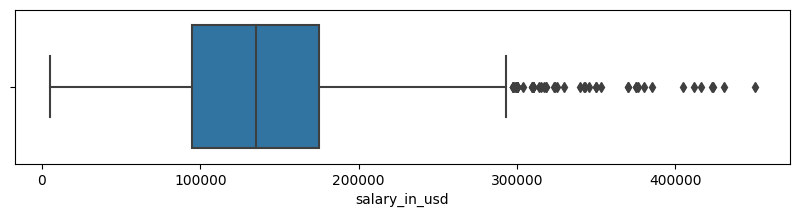

In [18]:
#Primero hacemos un bloxplot para poder visualizar los outliers

plt.figure(figsize=(10, 2))

sns.boxplot(x=df['salary_in_usd'])


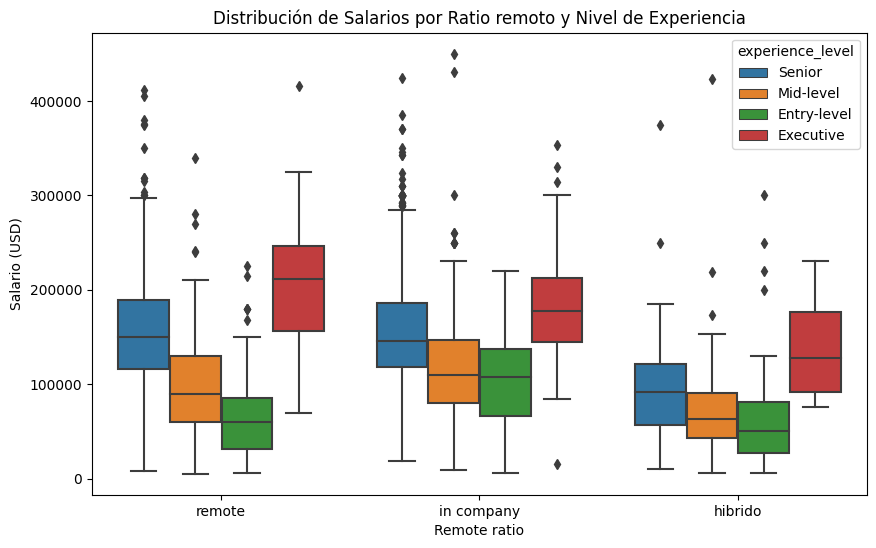

In [19]:
# creamos un boxplot para ver los outliers que tenemos en las principales variables de DF.

plt.figure(figsize=(10, 6))
sns.boxplot(x="remote_ratio", y="salary_in_usd", hue="experience_level", data=df)
plt.xlabel("Remote ratio")
plt.ylabel("Salario (USD)")
plt.title("Distribución de Salarios por Ratio remoto y Nivel de Experiencia")
plt.show()

In [20]:
# calculamos los valores atipicos y representacion de los mismos.

Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["salary_in_usd"] < lower_bound) | (df["salary_in_usd"] > upper_bound)]
outliers_percentage = (len(outliers) / len(df)) * 100

print(f"Total de valores atípicos: {len(outliers)}")
print(f"Porcentaje de valores atípicos: {outliers_percentage:.2f}%")

Total de valores atípicos: 63
Porcentaje de valores atípicos: 1.68%


In [21]:
# Mostramos las filas del dataframe original que son outliers
df_outliers = df[(df["salary_in_usd"] < lower_bound) | (df["salary_in_usd"] > upper_bound)]

# Ordenanamos las filas por salario en orden descendente
df_outliers_ordenado = df_outliers.sort_values(by='salary_in_usd', ascending=False)

# Mostramos el DataFrame ordenado
df_outliers_ordenado

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_c,employee_continent,company_location_c,company_location_continent,reside_en_mismo_pais
3522,2020,Mid-level,Full-time,Research Scientist,450000,in company,M,United States of America,América,United States of America,América,Sí
2011,2022,Mid-level,Full-time,Data Analyst,430967,in company,M,United Kingdom,Europa,United Kingdom,Europa,Sí
528,2023,Senior,Full-time,AI Scientist,423834,in company,L,Israel,Asia,Israel,Asia,Sí
3747,2021,Mid-level,Full-time,Applied Machine Learning Scientist,423000,hibrido,L,United States of America,América,United States of America,América,Sí
3675,2021,Executive,Contract,Principal Data Scientist,416000,remote,S,United States of America,América,United States of America,América,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
2832,2022,Executive,Full-time,Data Engineer,297500,remote,M,United States of America,América,United States of America,América,Sí
482,2023,Senior,Full-time,Data Scientist,297300,remote,M,United States of America,América,United States of America,América,Sí
1675,2023,Senior,Full-time,Data Science Manager,297300,remote,M,United States of America,América,United States of America,América,Sí
716,2023,Senior,Full-time,Data Scientist,297300,remote,M,United States of America,América,United States of America,América,Sí


In [84]:
info_columnas(df_outliers)

Resumen de la columna 'work_year':
2023    38
2022    20
2020     3
2021     2
Name: work_year, dtype: int64
Resumen de la columna 'experience_level':
Senior         43
Executive      14
Mid-level       5
Entry-level     1
Name: experience_level, dtype: int64
Resumen de la columna 'employment_type':
Full-time    62
Contract      1
Name: employment_type, dtype: int64
Resumen de la columna 'job_title':
Data Engineer                         16
Data Scientist                        10
Data Science Manager                   7
Machine Learning Engineer              6
Research Scientist                     4
Applied Scientist                      3
Director of Data Science               2
Data Architect                         2
Data Analyst                           2
Head of Data Science                   1
Principal Data Scientist               1
Applied Data Scientist                 1
Data Analytics Lead                    1
Data Science Tech Lead                 1
Computer Vision Engine

En el conjunto de datos, se encontró que el 1.68% de los salarios caen en la categoría de outliers, representando en su mayoría roles senior y ejecutivos en empresas medianas y grandes con sede en los Estados Unidos.

## Analisis de variables.

# 1. Salary

In [22]:
# describe de Salary. 

salario = df["salary_in_usd"]
print(salario.describe())

#Analizamos el coef de asimetria y la curtosis.


moda_salario = df['salary_in_usd'].mode()
print("La moda del salario es:", moda_salario)
coef_asimetria = skew(salario)
print("el coeficiente de asimetria es a: ",coef_asimetria)
curtorsis = kurtosis(salario)
print("la curtosis es igual a: ",curtorsis)


count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
La moda del salario es: 0    100000
Name: salary_in_usd, dtype: int64
el coeficiente de asimetria es a:  0.5361868674235593
la curtosis es igual a:  0.8312989014514311


In [88]:
# filtramos el df para ver las variables de la moda 

df_moda = df[df["salary_in_usd"] == 100000]
print(df_moda)

      work_year experience_level employment_type              job_title  \
12         2023           Senior       Full-time           Data Analyst   
39         2023      Entry-level       Full-time   Data Quality Analyst   
135        2023        Mid-level       Full-time          Data Engineer   
153        2023        Mid-level       Full-time          Data Engineer   
230        2023           Senior       Full-time   Data Quality Analyst   
...         ...              ...             ...                    ...   
3504       2021        Mid-level       Full-time          Data Engineer   
3555       2021        Mid-level       Full-time        BI Data Analyst   
3621       2021      Entry-level       Full-time     Research Scientist   
3627       2021      Entry-level       Full-time         Data Scientist   
3753       2020      Entry-level        Contract  Business Data Analyst   

      salary_in_usd remote_ratio company_size      employee_residence_c  \
12           100000     

In [89]:
#vemos la informacion que tenemos en las columnas del df_moda
info_columnas(df_moda)

Resumen de la columna 'work_year':
2022    55
2023    37
2021     6
2020     1
Name: work_year, dtype: int64
Resumen de la columna 'experience_level':
Senior         40
Mid-level      40
Entry-level    18
Executive       1
Name: experience_level, dtype: int64
Resumen de la columna 'employment_type':
Full-time    95
Freelance     2
Part-time     1
Contract      1
Name: employment_type, dtype: int64
Resumen de la columna 'job_title':
Data Analyst                   34
Data Engineer                  20
Data Scientist                 14
Machine Learning Engineer       3
Research Scientist              3
Data Quality Analyst            3
Data Operations Engineer        3
Business Data Analyst           2
BI Developer                    2
Research Engineer               2
Analytics Engineer              2
Machine Learning Researcher     2
ML Engineer                     1
Machine Learning Developer      1
Financial Data Analyst          1
Data Science Engineer           1
Product Data Analyst

In [26]:

# Prueba de normalidad
_, p_value = shapiro(df["salary_in_usd"])

# Imprimir el resultado
if p_value > 0.05:
    print("La distribución sigue una distribución normal")
else:
    print("La distribución no sigue una distribución normal")

La distribución no sigue una distribución normal


C:\Users\Hp\AppData\Local\Temp\ipykernel_7700\2005634634.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_salario = stats.mode(df["salary_in_usd"]).mode[0]


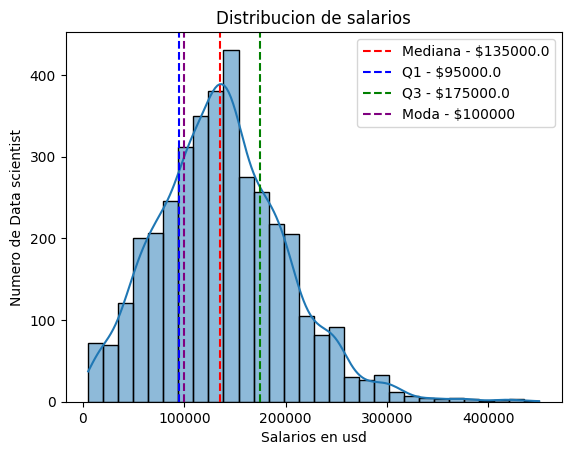

In [27]:
# Vemos el gráfico de distribución del salario y graficamos sus Q1, Q3, mediana y moda.

sns.histplot(df["salary_in_usd"], bins=30, kde=True)
plt.title("Distribucion de salarios")
plt.xlabel("Salarios en usd")
plt.ylabel("Numero de Data scientist")

mediana_salario = df["salary_in_usd"].median()
q1_salario = np.percentile(df["salary_in_usd"],25)
q3_salario = np.percentile(df["salary_in_usd"],75)
moda_salario = stats.mode(df["salary_in_usd"]).mode[0]

plt.axvline(mediana_salario, color='red', linestyle='--', label='Mediana - ${}'.format(mediana_salario))
plt.axvline(q1_salario, color='blue', linestyle='--', label= 'Q1 - ${}'.format(q1_salario))
plt.axvline(q3_salario, color='green', linestyle='--', label='Q3 - ${}'.format(q3_salario))
plt.axvline(moda_salario, color='purple', linestyle='--', label= 'Moda - ${}'.format(moda_salario)) 
plt.legend()

plt.show()

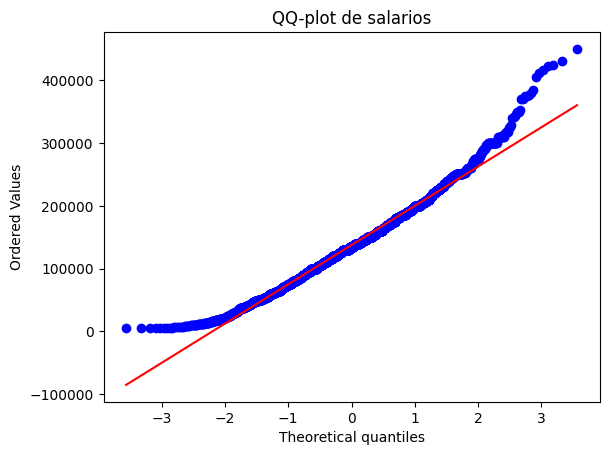

In [28]:

# QQ-plot para ver como la variable salary no sigue una distribución normal.
probplot(df["salary_in_usd"], plot=plt)
plt.title("QQ-plot de salarios")

plt.show()


In [86]:

# calculamos el promedio salarial por año

salario_promedio_por_año = df.groupby("work_year")["salary_in_usd"].median().reset_index()

salario_promedio_por_año = salario_promedio_por_año.sort_values("work_year")

# Hacemos el cálculo de cuánto aumentó año a año el promedio salarial en cantidad y luego en %
# creamos las variables en 0 y luego hacemos un for para ir iterando

salario_promedio_por_año['diferencia'] = 0
salario_promedio_por_año['cambio %'] = 0

for i in range(1, len(salario_promedio_por_año)):
    # Calculamos la diferencia de salario respecto al año anterior
    salario_promedio_por_año.loc[i, 'diferencia'] = salario_promedio_por_año.loc[i, 'salary_in_usd'] - salario_promedio_por_año.loc[i-1, 'salary_in_usd']
    
    # Calculamos el cambio porcentual respecto al año anterior
    salario_promedio_por_año.loc[i, 'cambio %'] = (salario_promedio_por_año.loc[i, 'diferencia'] / salario_promedio_por_año.loc[i-1, 'salary_in_usd']) * 100

salario_promedio_por_año['cambio %'] = salario_promedio_por_año['cambio %'].astype(int)



   work_year  salary_in_usd
0       2020        73065.0
1       2021        80000.0
2       2022       131300.0
3       2023       143860.0


In [87]:
salario_promedio_por_año

,work_year,salary_in_usd,diferencia,cambio %
0,2020,73065.0,0,0
1,2021,80000.0,6935,9
2,2022,131300.0,51300,64
3,2023,143860.0,12560,9


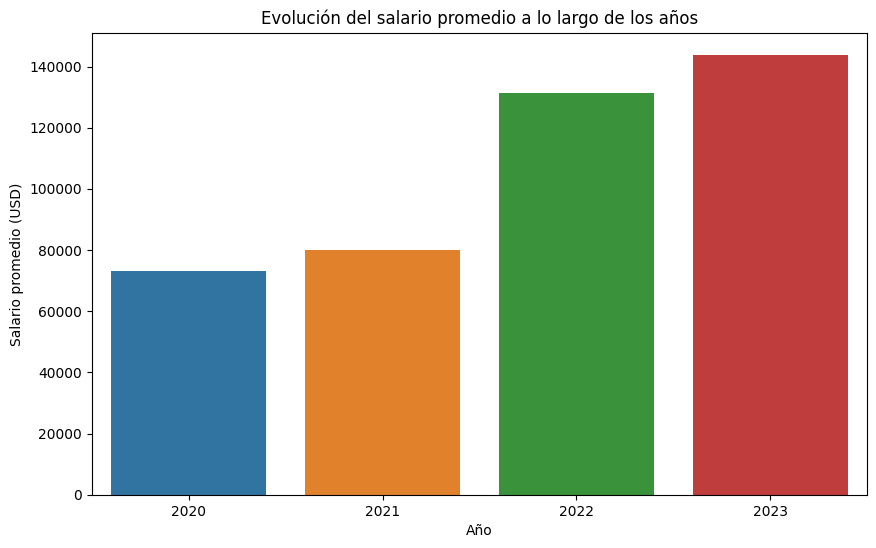

In [31]:
# Gráfico de barras del salario promedio por año
plt.figure(figsize=(10, 6))
sns.barplot(x="work_year", y="salary_in_usd", data=salario_promedio_por_año)
plt.xlabel("Año")
plt.ylabel("Salario promedio (USD)")
plt.title("Evolución del salario promedio a lo largo de los años")
plt.show()

La variable 'salary' sigue una distribución asimétrica positiva con una curtosis inferior a la de una distribución normal. Los salarios varían desde $5,132 hasta $450,000, con una media de $137,570. El salario más común es $100,000, que se observa principalmente en roles de nivel medio y senior en empresas medianas en América, especialmente en los Estados Unidos. Sin embargo, la distribución del salario no es normal. En términos de evolución anual, se observa un incremento significativo del salario promedio del 64% de 2021 a 2022, y del 9% de 2022 a 2023.

# 2. experience_lavel

Senior         2516
Mid-level       805
Entry-level     320
Executive       114
Name: experience_level, dtype: int64


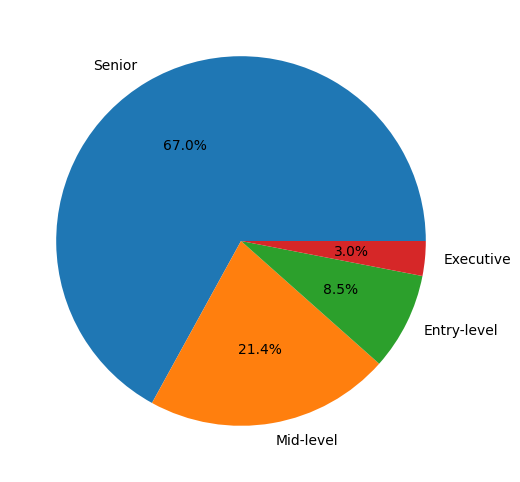

In [32]:
# Contamos la cantidad de puestos por tipo de experiencia
cantidad_por_experiencia = df['experience_level'].value_counts()
print(cantidad_por_experiencia)

# gráfico de torta
plt.figure(figsize=(15, 6))
plt.pie(cantidad_por_experiencia, labels=cantidad_por_experiencia.index,autopct='%1.1f%%')
plt.show()

In [33]:
prom_salario_experiencia = df.groupby('experience_level')['salary_in_usd'].median().sort_values(ascending=False)
print(prom_salario_experiencia)

experience_level
Executive      196000.0
Senior         146000.0
Mid-level      100000.0
Entry-level     70000.0
Name: salary_in_usd, dtype: float64


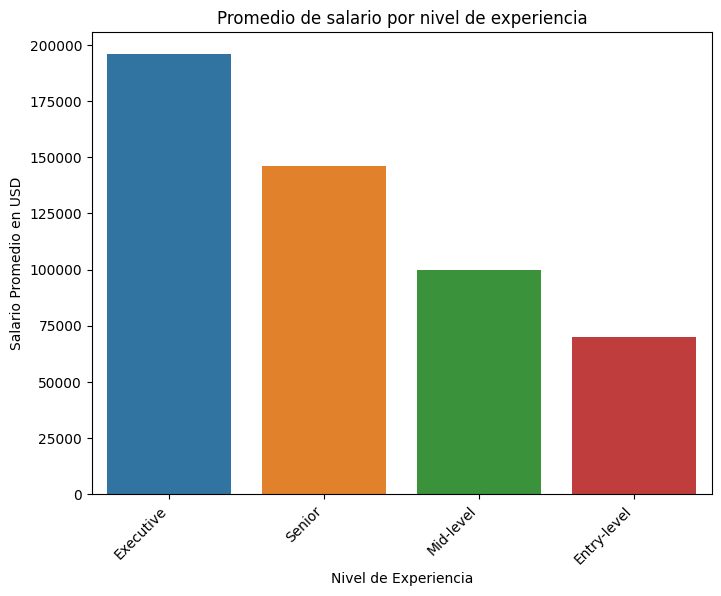

In [34]:

# gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=prom_salario_experiencia.index, y=prom_salario_experiencia.values)
plt.title('Promedio de salario por nivel de experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Promedio en USD')
plt.xticks(rotation=45, ha='right') 
plt.show()


experience_level  Entry-level  Executive  Mid-level  Senior
work_year                                                  
2020                       23          3         32      18
2021                       55         10         92      73
2022                      124         41        361    1138
2023                      118         60        320    1287
experience_level  Entry-level  Executive  Mid-level     Senior
work_year                                                     
2020                   7.1875   2.631579   3.975155   0.715421
2021                  17.1875   8.771930  11.428571   2.901431
2022                  38.7500  35.964912  44.844720  45.230525
2023                  36.8750  52.631579  39.751553  51.152623


<Figure size 1000x600 with 0 Axes>

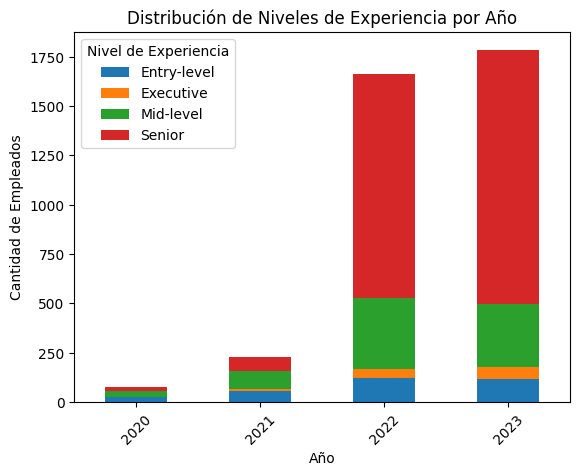

In [35]:
# Tabla de frecuencias de niveles de experiencia por año
experiencia_por_año = df.groupby(["work_year", "experience_level"]).size().unstack()

print(experiencia_por_año)

# Convertir la tabla de frecuencias a porcentajes
experiencia_por_año_porcentajes = experiencia_por_año.apply(lambda x: (x / x.sum()) * 100)

print(experiencia_por_año_porcentajes)

# Gráfico de barras apiladas de la distribución de niveles de experiencia por año
plt.figure(figsize=(10, 6))
experiencia_por_año.plot(kind="bar", stacked=True)
plt.xlabel("Año")
plt.ylabel("Cantidad de Empleados")
plt.title("Distribución de Niveles de Experiencia por Año")
plt.xticks(rotation=45) 
plt.legend(title='Nivel de Experiencia')
plt.show()


    work_year experience_level  salary_in_usd
0        2020      Entry-level        45896.0
1        2020        Executive        79833.0
2        2020        Mid-level        78395.5
3        2020           Senior       118552.0
4        2021      Entry-level        55000.0
5        2021        Executive       151833.5
6        2021        Mid-level        72606.0
7        2021           Senior       120000.0
8        2022      Entry-level        61252.0
9        2022        Executive       187200.0
10       2022        Mid-level        98506.0
11       2022           Senior       142063.5
12       2023      Entry-level        85000.0
13       2023        Executive       200000.0
14       2023        Mid-level       109685.5
15       2023           Senior       150000.0


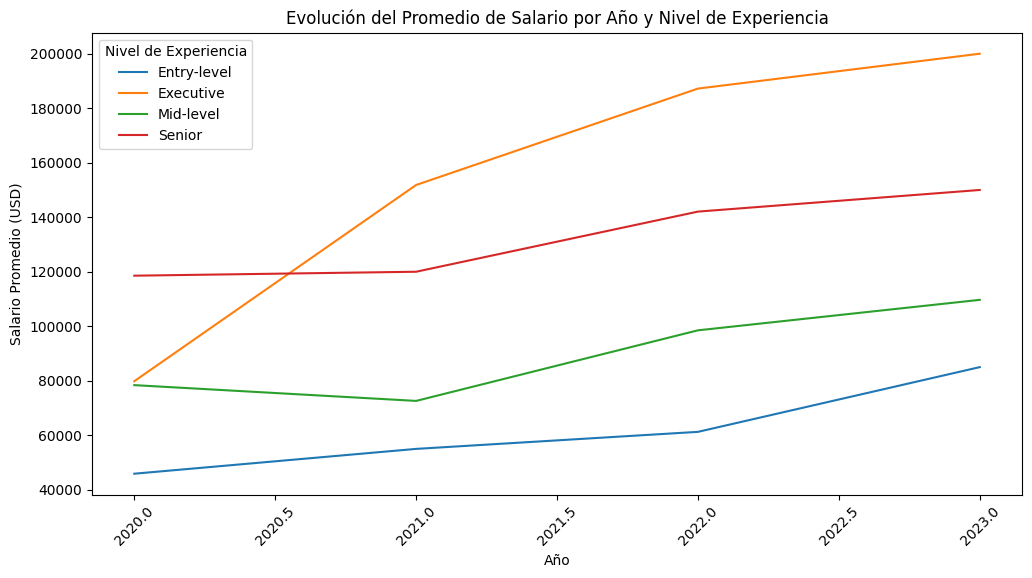

In [36]:
# Calcular el salario promedio por año y nivel de experiencia
salario_promedio_por_año_y_experiencia = df.groupby(["work_year", "experience_level"])["salary_in_usd"].median().reset_index()

print(salario_promedio_por_año_y_experiencia)

# Gráfico de línea de la evolución del promedio de salario por año y nivel de experiencia
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="experience_level", data=salario_promedio_por_año_y_experiencia)
plt.xlabel("Año")
plt.ylabel("Salario Promedio (USD)")
plt.title("Evolución del Promedio de Salario por Año y Nivel de Experiencia")
plt.xticks(rotation=45) 
plt.legend(title='Nivel de Experiencia')
plt.show()

La variable "experience_level" indica el nivel de experiencia de los trabajadores en sus roles actuales. La distribución de esta variable es la siguiente:

Senior: 2516
Mid-level: 805
Entry-level: 320
Executive: 114
Esta distribución muestra que la mayoría de los trabajadores son de nivel Senior, seguido por Mid-level, Entry-level y finalmente Executive.

Además, encontramos una relación directa entre el nivel de experiencia y el salario promedio. Los empleados con nivel Executive obtienen el salario promedio más alto, seguido por Senior, Mid-level y finalmente Entry-level.

# 3. employment_type

Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64


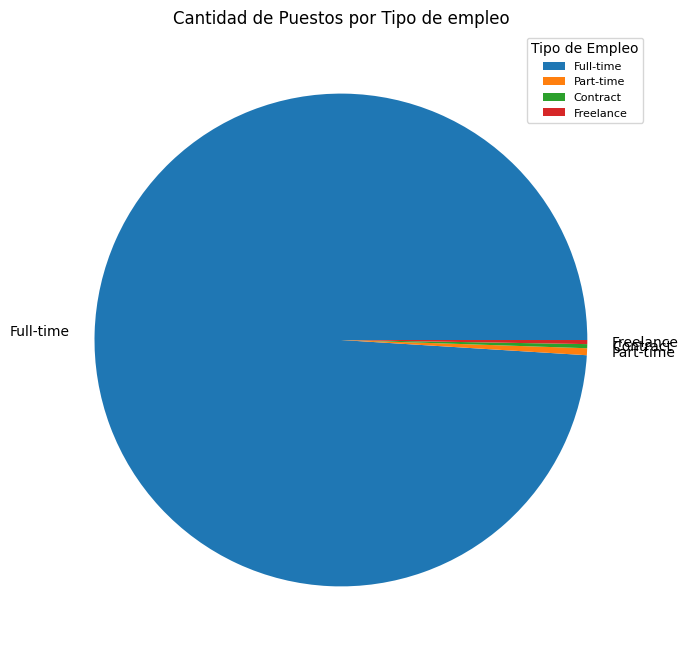

In [39]:
# Contamos la cantidad de puestos por tipo de experiencia
cantidad_por_tipo = df['employment_type'].value_counts()
print(cantidad_por_tipo)

# Creamos el gráfico de torta
plt.figure(figsize=(15, 8))
plt.pie(cantidad_por_tipo, labels=cantidad_por_tipo.index)
plt.title('Cantidad de Puestos por Tipo de empleo')
plt.legend(cantidad_por_tipo.index, title='Tipo de Empleo', loc='best', fontsize=8)
plt.show()

In [40]:
prom_salario_tipoempleo = df.groupby('employment_type')['salary_in_usd'].median().sort_values(ascending=False)
print(prom_salario_tipoempleo)

employment_type
Full-time    135000.0
Contract      75000.0
Freelance     50000.0
Part-time     21669.0
Name: salary_in_usd, dtype: float64


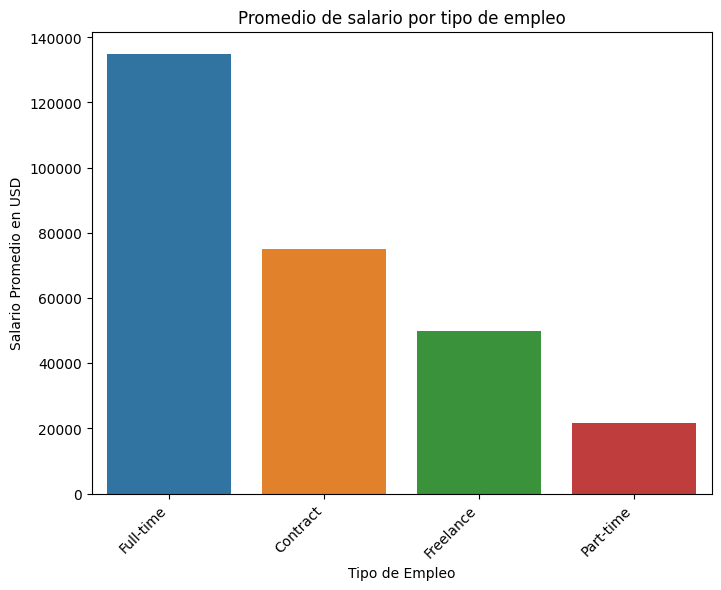

In [41]:
#gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=prom_salario_tipoempleo.index, y=prom_salario_tipoempleo.values)
plt.title('Promedio de salario por tipo de empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario Promedio en USD')
plt.xticks(rotation=45, ha='right')
plt.show()

    work_year employment_type  salary_in_usd
0        2020        Contract       100000.0
1        2020       Freelance        60000.0
2        2020       Full-time        75544.0
3        2020       Part-time        18817.5
4        2021        Contract       270000.0
5        2021       Freelance        20000.0
6        2021       Full-time        82500.0
7        2021       Part-time        12000.0
8        2022        Contract        45234.5
9        2022       Freelance        75000.0
10       2022       Full-time       132000.0
11       2022       Part-time        52533.0
12       2023        Contract        27750.0
13       2023       Freelance        50000.0
14       2023       Full-time       143862.5
15       2023       Part-time        17779.0


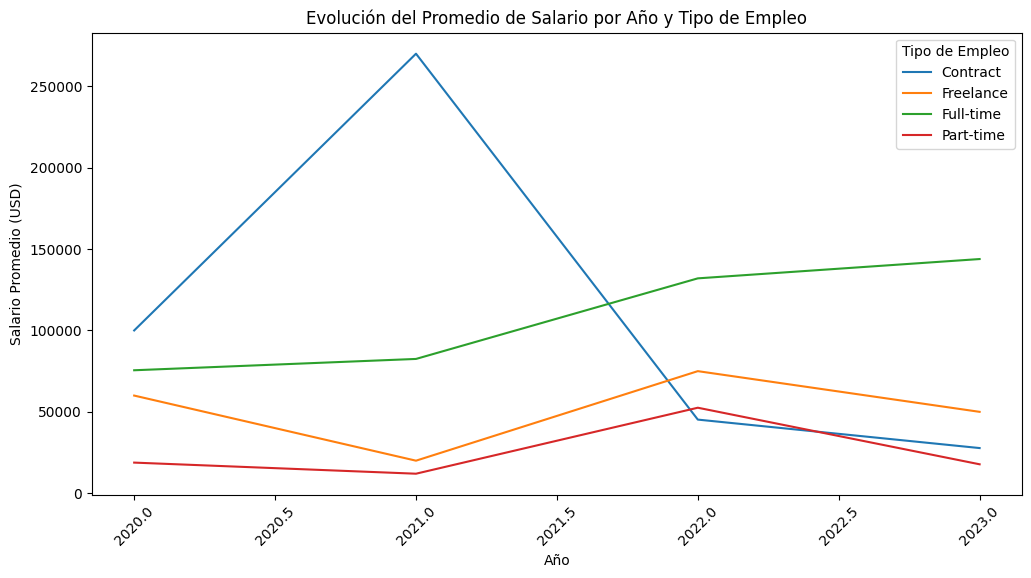

In [42]:
# Calcular el salario promedio por año y tipo de empleo
salario_promedio_por_año_y_empleo = df.groupby(["work_year", "employment_type"])["salary_in_usd"].median().reset_index()

print(salario_promedio_por_año_y_empleo)

# Gráfico de línea de la evolución del promedio de salario por año y tipo de empleo
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="employment_type", data=salario_promedio_por_año_y_empleo)
plt.xlabel("Año")
plt.ylabel("Salario Promedio (USD)")
plt.title("Evolución del Promedio de Salario por Año y Tipo de Empleo")
plt.xticks(rotation=45)  
plt.legend(title='Tipo de Empleo')
plt.show()


La mayoría de los trabajadores en el conjunto de datos están empleados a tiempo completo (99.2%). Otros tipos de empleo, como el trabajo a tiempo parcial, los contratos y el freelance, representan una pequeña proporción de los trabajadores. Hay una correlación directa entre el tipo de empleo y el salario: los trabajadores a tiempo completo ganan un salario promedio más alto, seguido por los trabajadores por contrato, freelancers y finalmente los trabajadores a tiempo parcial.

# 4. Company_size

In [43]:
# Calculamos el promedio de salario por tamaño de empresa y la cantidad
prom_salario_tam_empresa = df.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)
cantidad_por_tamano = df['company_size'].value_counts()

# Creamos un DataFrame con la info
data_tamano = pd.DataFrame({'Promedio de Salario (USD)': prom_salario_tam_empresa,
                     'Cantidad de Puestos': cantidad_por_tamano})
print(data_tamano)


   Promedio de Salario (USD)  Cantidad de Puestos
M                   140000.0                 3153
L                   108500.0                  454
S                    62146.0                  148


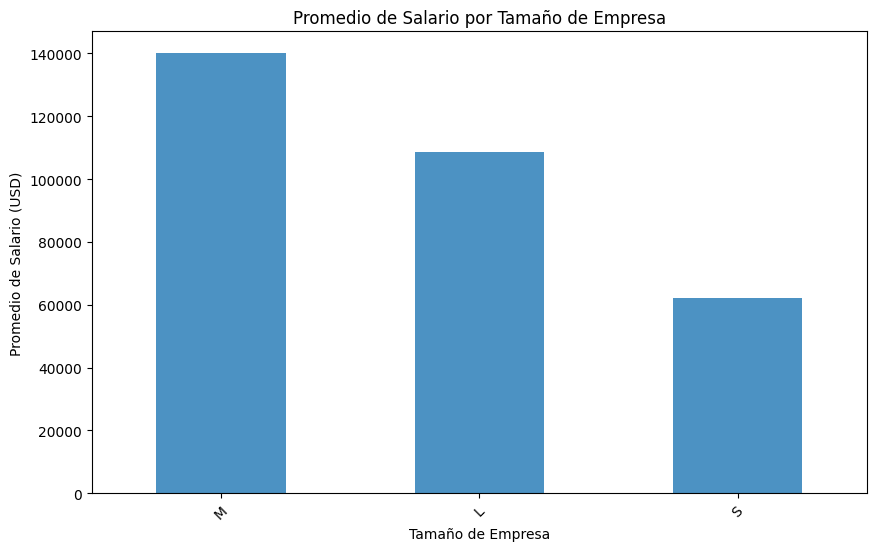

In [90]:
#gráfico de barras
plt.figure(figsize=(10, 6))
data_tamano['Promedio de Salario (USD)'].plot(kind='bar', alpha=0.8)
plt.xticks(rotation=45)
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Promedio de Salario (USD)')
plt.title('Promedio de Salario por Tamaño de Empresa')

plt.show()

    work_year company_size  salary_in_usd
0        2020            L        85000.0
1        2020            M        96500.0
2        2020            S        51321.0
3        2021            L        90734.0
4        2021            M        64411.5
5        2021            S        76833.0
6        2022            L       120000.0
7        2022            M       135000.0
8        2022            S        58418.5
9        2023            L       123700.0
10       2023            M       145000.0
11       2023            S        74875.5


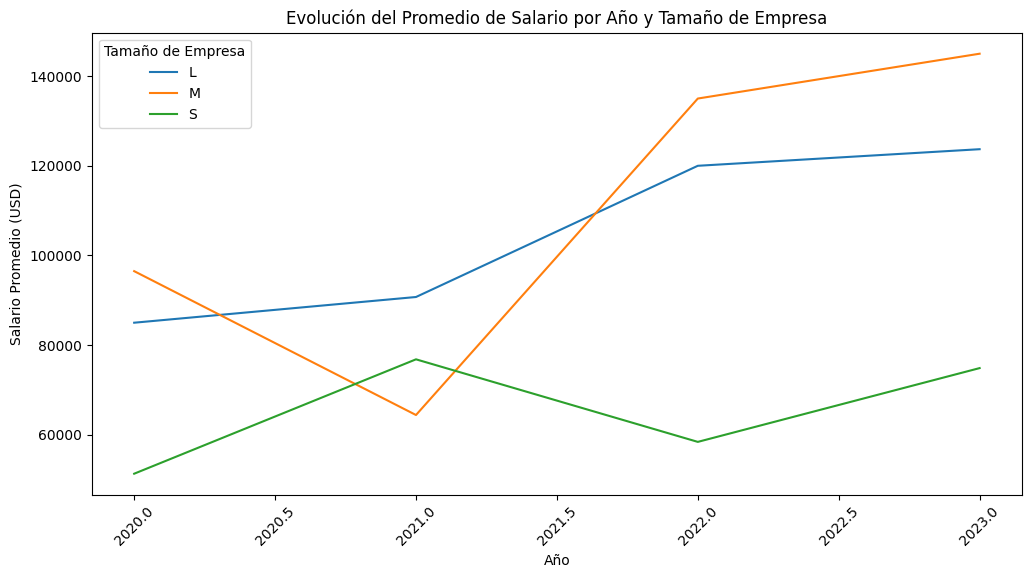

In [45]:
#Calcular el salario promedio por año y tamaño de empresa
salario_promedio_por_año_y_tamaño = df.groupby(["work_year", "company_size"])["salary_in_usd"].median().reset_index()

print(salario_promedio_por_año_y_tamaño)

#Gráfico de línea de la evolución del promedio de salario por año y tamaño de empresa
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="company_size", data=salario_promedio_por_año_y_tamaño)
plt.xlabel("Año")
plt.ylabel("Salario Promedio (USD)")
plt.title("Evolución del Promedio de Salario por Año y Tamaño de Empresa")
plt.xticks(rotation=45) 
plt.legend(title='Tamaño de Empresa')
plt.show()

Las empresas medianas (M) dominan el conjunto de datos, ofreciendo la mayoría de los puestos de trabajo en ciencia de datos. También pagan el salario más alto en promedio ($140,000). Las empresas grandes (L) y pequeñas (S) tienen menos representación y salarios promedio más bajos. La evolución del salario promedio a lo largo del tiempo muestra un crecimiento general en todos los tamaños de empresas, aunque el salario en las empresas medianas siempre se mantiene en la parte superior.

# 5. Company_location

In [46]:
def analisis_cantidad_y_porcentaje(df, columna):
    """
    Realiza el análisis de cantidad y porcentaje para una columna específica de un DataFrame.

    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna para realizar el análisis.

    Retorna:
        data_analisis (DataFrame): DataFrame con la cantidad y porcentaje de datos para la columna dada, ordenado de manera descendente.
    """
    #cantidad de datos por valor en la columna
    cantidad_por_valor = df[columna].value_counts()

    #porcentaje de datos para cada valor en la columna
    porcentaje_por_valor = (cantidad_por_valor / len(df)) * 100

    #DataFrame con la cantidad y el porcentaje de datos para la columna dada
    data_analisis = pd.DataFrame({'cantidad_de_datos': cantidad_por_valor,
                                  'porcentaje_de_datos': porcentaje_por_valor})

    #Ordenamos el DataFrame por cantidad de datos de manera descendente
    data_analisis = data_analisis.sort_values('porcentaje_de_datos', ascending=False)

    return data_analisis

In [47]:
data_ubicacion = analisis_cantidad_y_porcentaje(df,"company_location_c")
data_ubicacion = data_ubicacion.head(10)
                                    
data_ubicacion

,cantidad_de_datos,porcentaje_de_datos
United States of America,3040,80.958722
United Kingdom,172,4.580559
Canada,87,2.316911
Spain,77,2.050599
India,58,1.544607
Germany,56,1.491345
France,34,0.905459
Brazil,15,0.399467
Portugal,14,0.372836
Greece,14,0.372836


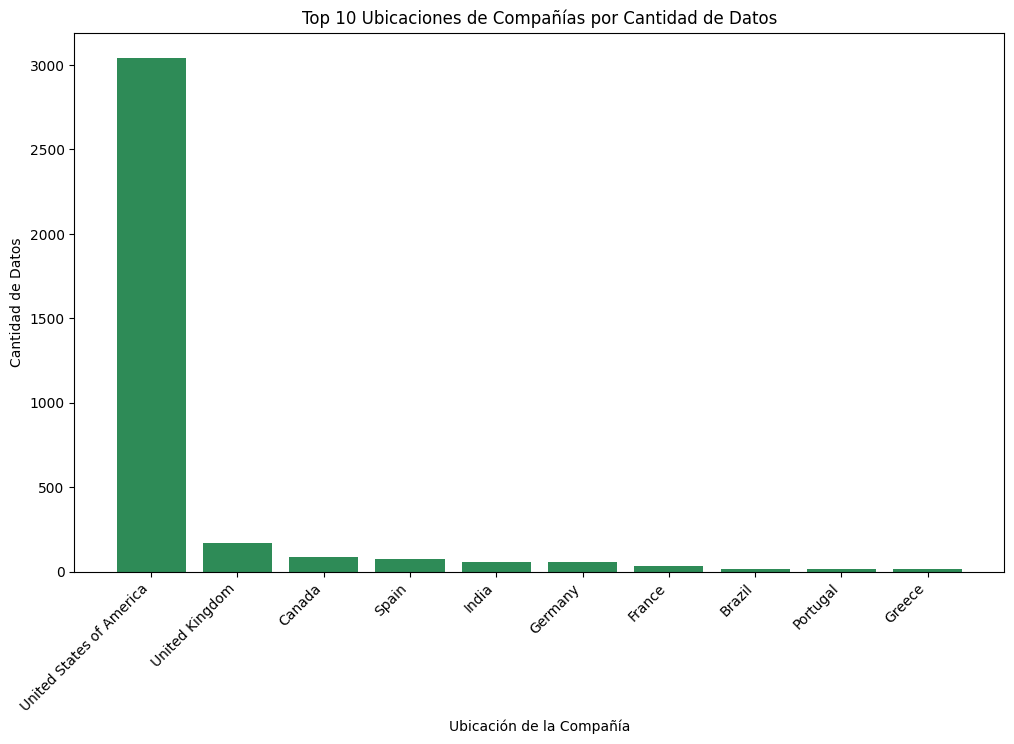

In [48]:
# Datos para el gráfico
ubicaciones = data_ubicacion.index
cantidades = data_ubicacion['cantidad_de_datos']

# Crear el gráfico
plt.figure(figsize=(12, 7))
plt.bar(ubicaciones, cantidades, color='seagreen')
plt.xlabel('Ubicación de la Compañía')
plt.ylabel('Cantidad de Datos')
plt.title('Top 10 Ubicaciones de Compañías por Cantidad de Datos')
plt.xticks(rotation=45, ha="right")

plt.show()

In [49]:
#Hacemos un funnel con el top 10 de paises

paises = data_ubicacion.index.tolist()
cantidad_de_datos = data_ubicacion['cantidad_de_datos'].tolist()


px.funnel(
         y = paises , x = cantidad_de_datos, title = 'Top 8 paises puestos de trabajo Data Science')


         company_location_c  salary_in_usd
9  United States of America       145000.0
1                    Canada       120000.0
8            United Kingdom        79513.0
3                   Germany        72721.5
2                    France        58969.5
6                  Portugal        52932.5
4                    Greece        50216.0
7                     Spain        47280.0
0                    Brazil        42000.0
5                     India        18276.0


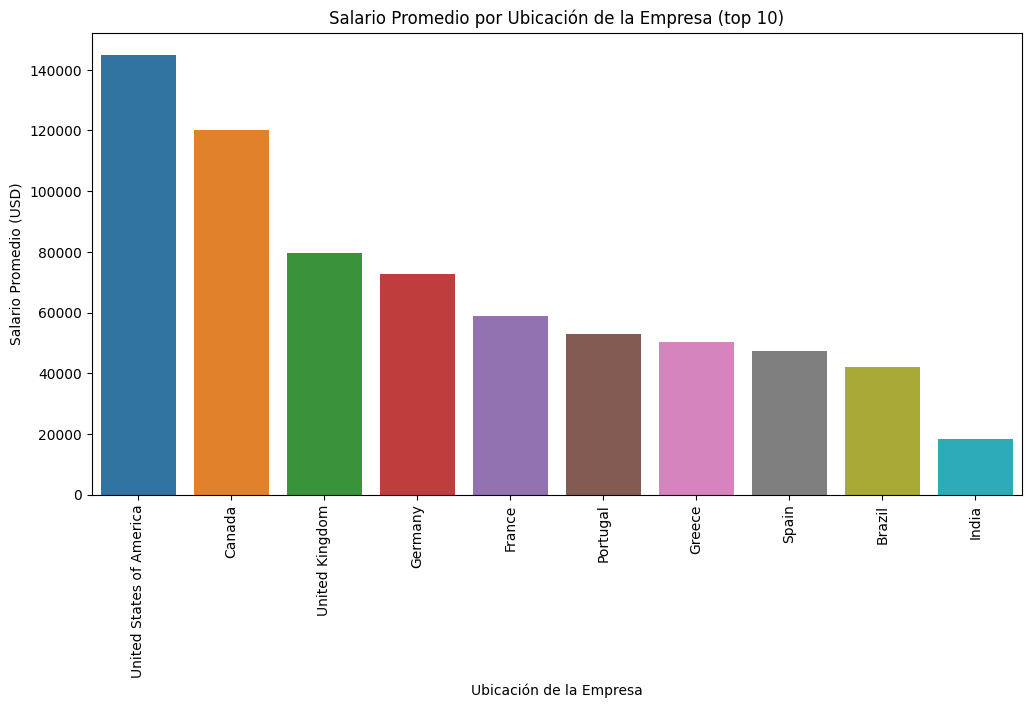

In [50]:


#titulos con una cantidad de puestos mayor a 5
ubicaciones_filtradas = data_ubicacion[data_ubicacion["cantidad_de_datos"] > 5].index

#DataFrame original por las ubicaciones seleccionadas
df_filtrado_ubi = df[df["company_location_c"].isin(ubicaciones_filtradas)]

#salario promedio por titulo solo para las titulos seleccionadas
salario_promedio_por_ubicacion = df_filtrado_ubi.groupby("company_location_c")["salary_in_usd"].median().reset_index()

#titulos por salario promedio de manera descendente
salario_promedio_por_ubicacion = salario_promedio_por_ubicacion.sort_values("salary_in_usd", ascending=False)

salario_promedio_por_ubicacion = salario_promedio_por_ubicacion.head(10)
(print(salario_promedio_por_ubicacion))
#gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="company_location_c", y="salary_in_usd", data=salario_promedio_por_ubicacion)
plt.xlabel("Ubicación de la Empresa")
plt.ylabel("Salario Promedio (USD)")
plt.title("Salario Promedio por Ubicación de la Empresa (top 10)")
plt.xticks(rotation=90)
plt.show()


Los datos muestran que la mayoría de los puestos de trabajo en ciencia de datos están ubicados en los Estados Unidos, seguidos del Reino Unido y Canadá. El salario promedio más alto se ofrece en los Estados Unidos, seguido de Canadá y el Reino Unido. A lo largo del tiempo, el salario promedio de la ciencia de datos ha mostrado un aumento general en los países que tienen datos disponibles para cada año entre 2020 y 2023.

# 6. Job_title

In [53]:

data_titulo = analisis_cantidad_y_porcentaje(df,"job_title")
print(data_titulo.head(10))

                           cantidad_de_datos  porcentaje_de_datos
Data Engineer                           1040            27.696405
Data Scientist                           840            22.370173
Data Analyst                             612            16.298269
Machine Learning Engineer                289             7.696405
Analytics Engineer                       103             2.743009
Data Architect                           101             2.689747
Research Scientist                        82             2.183755
Data Science Manager                      58             1.544607
Applied Scientist                         58             1.544607
Research Engineer                         37             0.985353


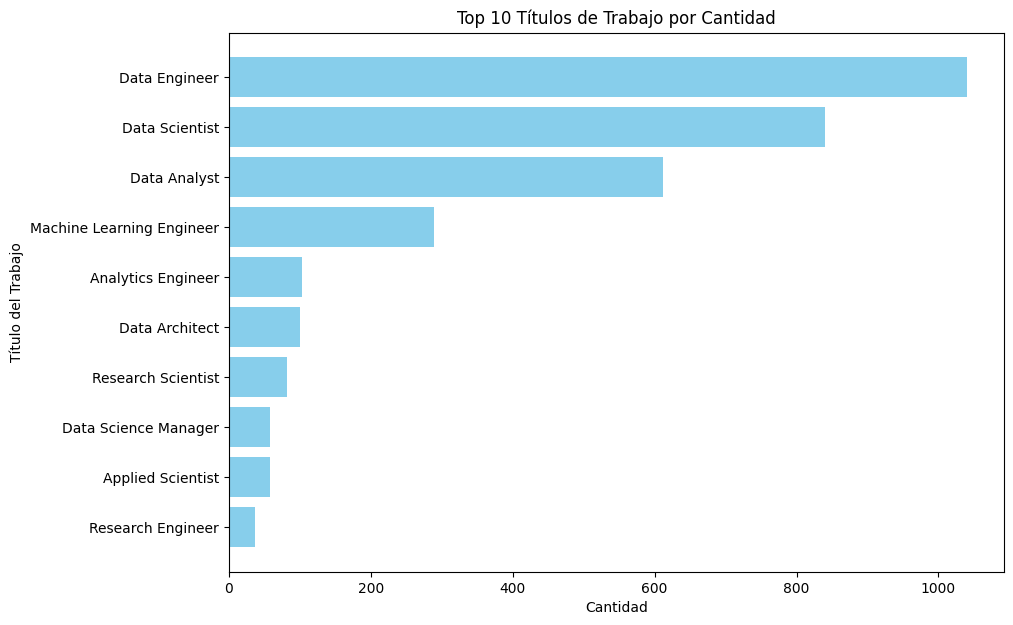

In [54]:
# Datos para el gráfico
titulos = data_titulo.head(10).index
cantidades = data_titulo['cantidad_de_datos'].head(10)

# Crear el gráfico
plt.figure(figsize=(10, 7))
plt.barh(titulos, cantidades, color='skyblue')
plt.xlabel('Cantidad')
plt.ylabel('Título del Trabajo')
plt.title('Top 10 Títulos de Trabajo por Cantidad')
plt.gca().invert_yaxis()  # Para mostrar el título con la mayor cantidad en la parte superior
plt.show()

In [55]:
# Paso 1: Filtrar el dataframe original para obtener sólo las filas de los 10 títulos de trabajo más comunes
top_10 = data_titulo.head(10).index.tolist()
df_top_10 = df[df['job_title'].isin(top_10)]

# Paso 2: Calcular el salario promedio y el nivel de experiencia más común para cada título de trabajo

# Salario promedio por título
promedio_sueldo_tit = df_top_10.groupby('job_title')['salary_in_usd'].median()
promedio_total_top = df_top_10['salary_in_usd'].median()
print(promedio_total_top)
# Nivel de experiencia más común por título
nivel_experiencia_titulo = df_top_10.groupby('job_title')['experience_level'].agg(lambda x: x.value_counts().index[0])

resultado = pd.DataFrame({'Promedio de Salario (USD)': promedio_sueldo_tit,'Nivel de Experiencia': nivel_experiencia_titulo})
resultado

136000.0


,Promedio de Salario (USD),Nivel de Experiencia
job_title,,
Analytics Engineer,143860.0,Senior
Applied Scientist,191737.5,Senior
Data Analyst,106020.0,Senior
Data Architect,160000.0,Senior
Data Engineer,135000.0,Senior
Data Science Manager,183780.0,Senior
Data Scientist,141525.0,Senior
Machine Learning Engineer,150000.0,Senior
Research Engineer,155000.0,Senior


                        job_title  salary_in_usd
46         Data Science Tech Lead       375000.0
19           Cloud Data Architect       250000.0
35                      Data Lead       212500.0
28            Data Analytics Lead       211254.5
58                   Head of Data       202500.0
..                            ...            ...
86           Product Data Analyst        20000.0
91             Staff Data Analyst        15000.0
0   3D Computer Vision Researcher        15000.0
87         Product Data Scientist         8000.0
80             Power BI Developer         5409.0

[93 rows x 2 columns]


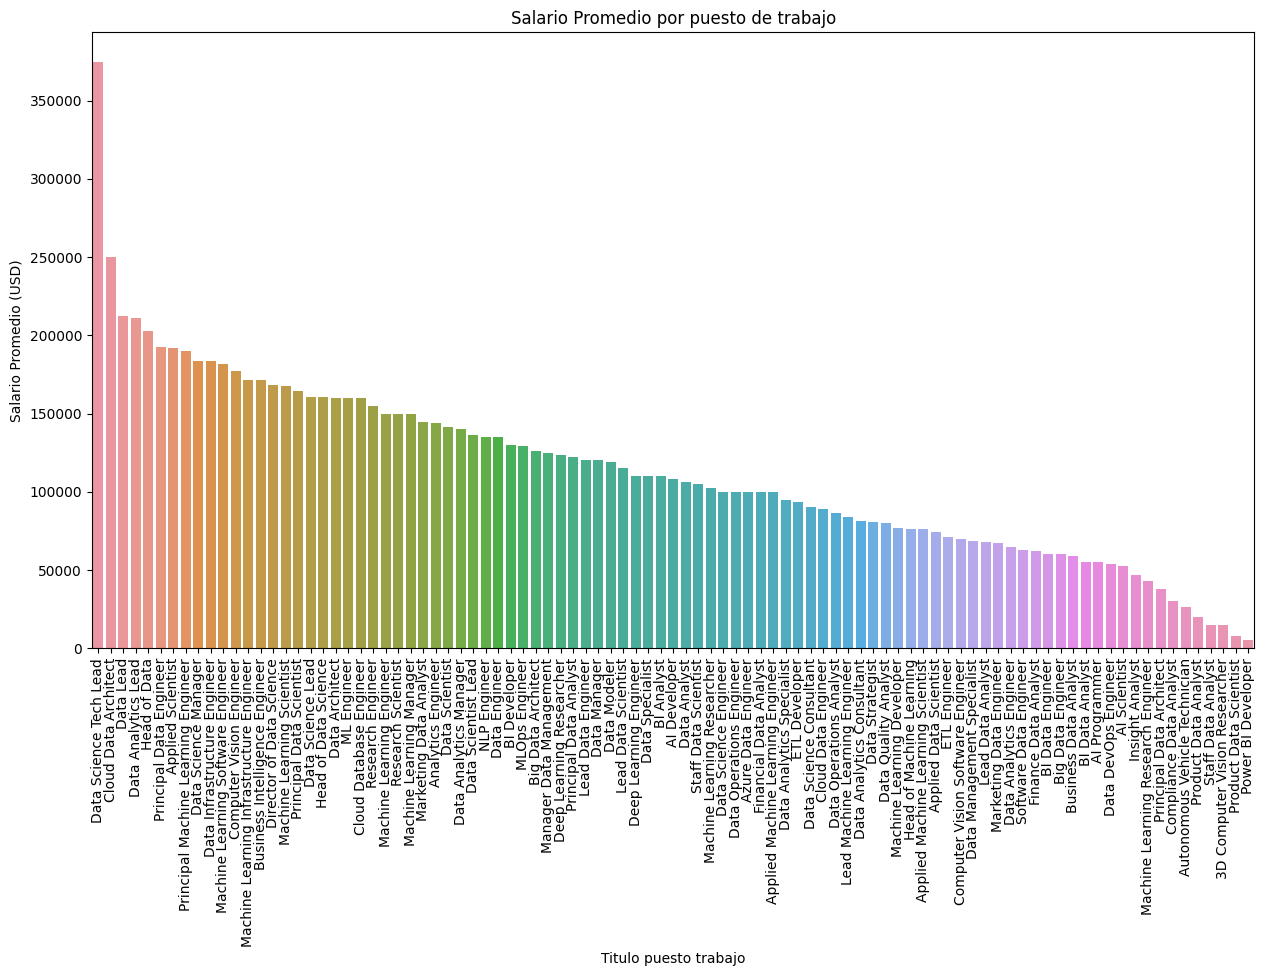

In [56]:
#salario promedio por titulo
salario_promedio_por_jt = df.groupby("job_title")["salary_in_usd"].median().reset_index()


salario_promedio_por_jt = salario_promedio_por_jt.sort_values("salary_in_usd", ascending=False)
print(salario_promedio_por_jt)

#gráfico de barras
plt.figure(figsize=(15, 8))
sns.barplot(x="job_title", y="salary_in_usd", data=salario_promedio_por_jt)
plt.xlabel("Titulo puesto trabajo")
plt.ylabel("Salario Promedio (USD)")
plt.title("Salario Promedio por puesto de trabajo")
plt.xticks(rotation=90) 
plt.show()

Los títulos de trabajo más comunes son "Data Engineer", "Data Scientist" y "Data Analyst".
El salario promedio varía considerablemente entre los diferentes títulos de trabajo.
La mayoría de los puestos de trabajo en el top 10 requieren un nivel de experiencia 'Senior'.
El salario ha mostrado una tendencia ascendente desde 2020 hasta 2023 para la mayoría de los títulos.

# 7. Remote_ratio 

In [59]:
data_ratio = analisis_cantidad_y_porcentaje(df,"remote_ratio")
data_ratio

,cantidad_de_datos,porcentaje_de_datos
in company,1923,51.211718
remote,1643,43.754993
hibrido,189,5.033289


In [91]:
prom_salario_remote = df.groupby('remote_ratio')['salary_in_usd'].median().sort_values(ascending=False)
print(prom_salario_remote)

remote_ratio
in company    139600.0
remote        135000.0
hibrido        63312.0
Name: salary_in_usd, dtype: float64


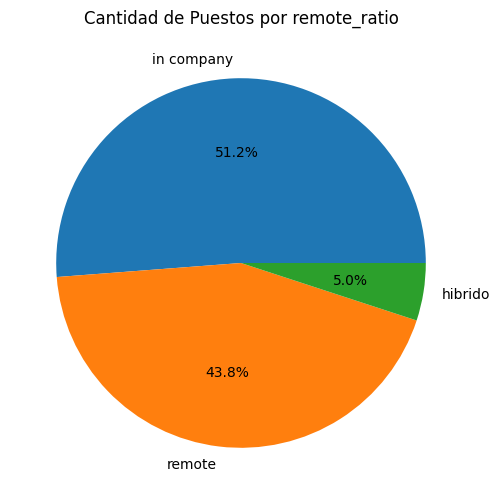

In [61]:

#gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(data_ratio["cantidad_de_datos"], labels=data_ratio.index,autopct='%1.1f%%')
plt.title('Cantidad de Puestos por remote_ratio')
plt.show()

remote_ratio  hibrido  in company  remote
work_year                                
2020               21          16      39
2021               76          34     120
2022               62         711     891
2023               30        1162     593


<Figure size 1000x600 with 0 Axes>

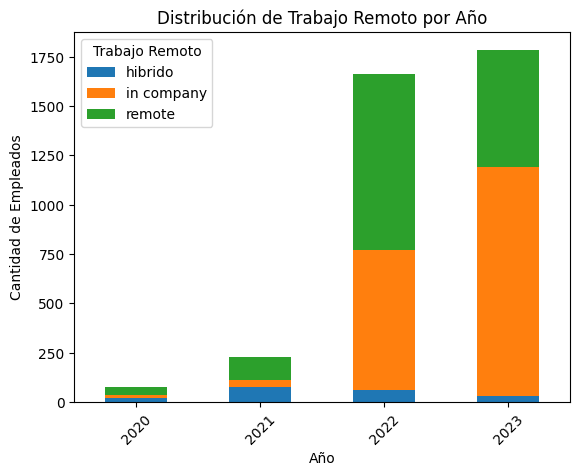

In [62]:
#Tabla de frecuencias de trabajo remoto por año
trabajo_remoto_por_año = df.groupby(["work_year", "remote_ratio"]).size().unstack()

print(trabajo_remoto_por_año)

#Gráfico de barras de la distribución de trabajo remoto por año
plt.figure(figsize=(10, 6))
trabajo_remoto_por_año.plot(kind="bar", stacked=True)
plt.xlabel("Año")
plt.ylabel("Cantidad de Empleados")
plt.title("Distribución de Trabajo Remoto por Año")
plt.xticks(rotation=45)  
plt.legend(title='Trabajo Remoto')
plt.show()

remote_ratio    hibrido  in company     remote
work_year                                     
2020          27.631579   21.052632  51.315789
2021          33.043478   14.782609  52.173913
2022           3.725962   42.728365  53.545673
2023           1.680672   65.098039  33.221289


<Figure size 1000x600 with 0 Axes>

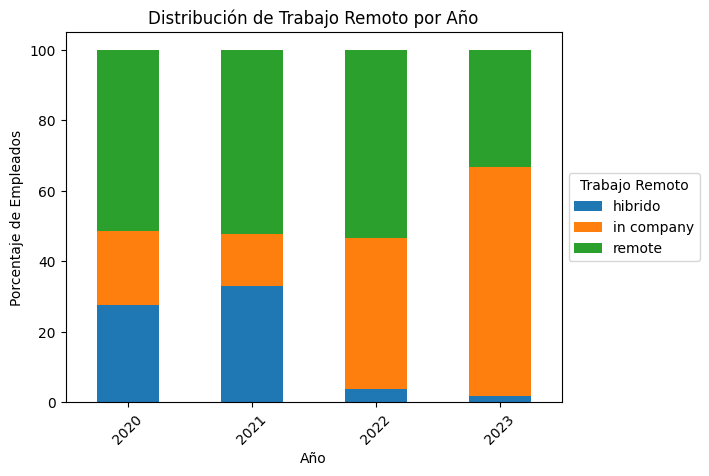

In [63]:
trabajo_remoto_por_año = df.groupby(["work_year", "remote_ratio"]).size().unstack()

trabajo_remoto_por_año_porcentaje = trabajo_remoto_por_año.apply(lambda row: row / row.sum() * 100, axis=1)

print(trabajo_remoto_por_año_porcentaje)

plt.figure(figsize=(10, 6))
trabajo_remoto_por_año_porcentaje.plot(kind="bar", stacked=True)
plt.xlabel("Año")
plt.ylabel("Porcentaje de Empleados")
plt.title("Distribución de Trabajo Remoto por Año")
plt.xticks(rotation=45) 
plt.legend(title='Trabajo Remoto', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


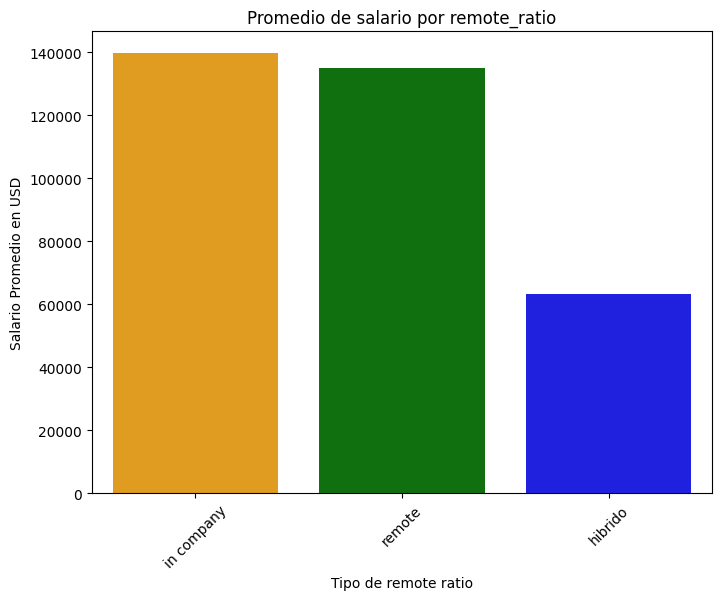

In [92]:
colores = {
    'hibrido': 'blue',
    'remote': 'green',
    'in company': 'orange'
}

# Ordena los colores según el orden de las barras en el gráfico
colores_ordenados = [colores[remote_ratio] for remote_ratio in prom_salario_remote.index]

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=prom_salario_remote.index, y=prom_salario_remote.values, palette=colores_ordenados)
plt.title('Promedio de salario por remote_ratio')
plt.xlabel('Tipo de remote ratio')
plt.ylabel('Salario Promedio en USD')
plt.xticks(rotation=45)
plt.show()


    work_year remote_ratio  salary_in_usd
0        2020      hibrido        62726.0
1        2020   in company        50750.5
2        2020       remote        87000.0
3        2021      hibrido        63771.0
4        2021   in company        80916.5
5        2021       remote        90000.0
6        2022      hibrido        65929.0
7        2022   in company       130000.0
8        2022       remote       136000.0
9        2023      hibrido        53654.0
10       2023   in company       145000.0
11       2023       remote       141600.0


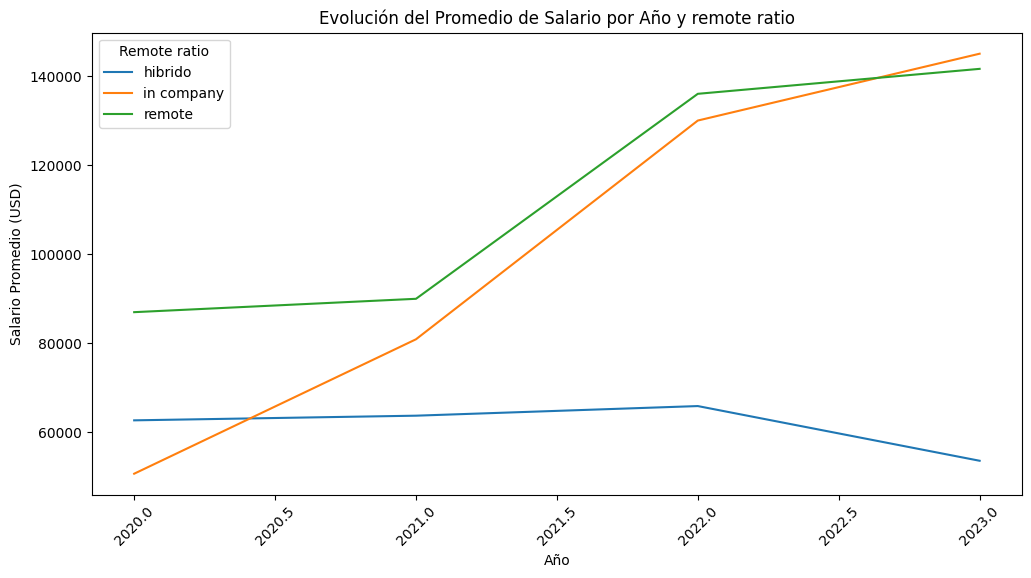

In [65]:
#Calculamos el salario promedio por año y remote
salario_promedio_por_año_y_rr = df.groupby(["work_year", "remote_ratio"])["salary_in_usd"].median().reset_index()

print(salario_promedio_por_año_y_rr)

#Gráfico de línea de la evolución del promedio de salario por año y remote
plt.figure(figsize=(12, 6))
sns.lineplot(x="work_year", y="salary_in_usd", hue="remote_ratio", data=salario_promedio_por_año_y_rr)
plt.xlabel("Año")
plt.ylabel("Salario Promedio (USD)")
plt.title("Evolución del Promedio de Salario por Año y remote ratio")
plt.xticks(rotation=45)  
plt.legend(title='Remote ratio')
plt.show()

In [66]:
# Obteniendo los top 8 países de la variable salario_promedio_por_ubicacion
paises = data_ubicacion.index.tolist()

# Filtrar el DataFrame original por estos países
df_filtered = df[df['company_location_c'].isin(paises)]

# Paso 1: Conteo por país y tipo de trabajo
grouped = df_filtered.groupby(['company_location_c', 'remote_ratio']).size().unstack(fill_value=0)

# Paso 2: Total de contrataciones por país
total_by_country = df_filtered['company_location_c'].value_counts()

# Paso 3: Calcular el porcentaje
for column in grouped.columns:
    grouped[column] = (grouped[column] / total_by_country) * 100

# Paso 4: Filtrar y ordenar para trabajos remotos y para trabajos in company

# Para trabajos remotos
remote_sorted = grouped.sort_values(by='remote', ascending=False)
remote_table = remote_sorted[['remote']]

# Para trabajos in company
in_company_sorted = grouped.sort_values(by='in company', ascending=False)
in_company_table = in_company_sorted[['in company']]

# Mostrar las tablas
print(remote_table)
print("\n")
print(in_company_table)


remote_ratio                 remote
company_location_c                 
Brazil                    86.666667
Greece                    71.428571
Canada                    52.873563
India                     51.724138
Germany                   44.642857
United States of America  43.782895
United Kingdom            37.790698
France                    35.294118
Spain                     29.870130
Portugal                  28.571429


remote_ratio              in company
company_location_c                  
Spain                      63.636364
United States of America   54.901316
United Kingdom             52.325581
Portugal                   50.000000
Canada                     33.333333
Germany                    28.571429
Greece                     14.285714
India                      13.793103
Brazil                     13.333333
France                      5.882353


Este análisis examina la distribución de los trabajadores en la ciencia de datos según su modalidad de trabajo (en la compañía, remoto o híbrido). Descubrimos que el 51.2% de los trabajadores están en la compañía, el 43.8% son remotos y el 5% son híbridos. Además, los salarios promedios en USD son de $139,600 para trabajadores en la compañía, $135,000 para remotos y $63,312 para híbridos.

En cuanto a la distribución anual, se observa un aumento en la proporción de trabajadores en la compañía y remotos a lo largo de los años 2020 a 2023, mientras que el trabajo híbrido se mantiene bajo.

Finalmente, encontramos variaciones significativas en las proporciones de trabajo remoto entre los diez países con más trabajadores en ciencia de datos, con Brasil y Grecia teniendo la mayor proporción de trabajadores remotos.

# 8 Employee_residence

In [67]:
data_residencia = analisis_cantidad_y_porcentaje(df, "employee_residence_c")
print(data_residencia)

                          cantidad_de_datos  porcentaje_de_datos
United States of America               3004            80.000000
United Kingdom                          167             4.447403
Canada                                   85             2.263648
Spain                                    80             2.130493
India                                    71             1.890812
...                                     ...                  ...
Malaysia                                  1             0.026631
Jersey                                    1             0.026631
New Zealand                               1             0.026631
Algeria                                   1             0.026631
Malta                                     1             0.026631

[78 rows x 2 columns]


        employee_residence_c  salary_in_usd
20  United States of America       145000.0
4                     Canada       120000.0
9                    Ireland       101943.0
19            United Kingdom        80036.0
6                    Germany        76833.0
1                  Australia        75050.0
11                     Japan        74000.0
13               Netherlands        73546.0
2                    Austria        68059.5
12                    Mexico        66000.0
5                     France        58969.5
17                  Portugal        52932.5
7                     Greece        52533.0
14                   Nigeria        50000.0
18                     Spain        47281.0
3                     Brazil        45000.0
0                  Argentina        39000.0
16                    Poland        38987.0
10                     Italy        33836.0
15                  Pakistan        30000.0
8                      India        20670.0


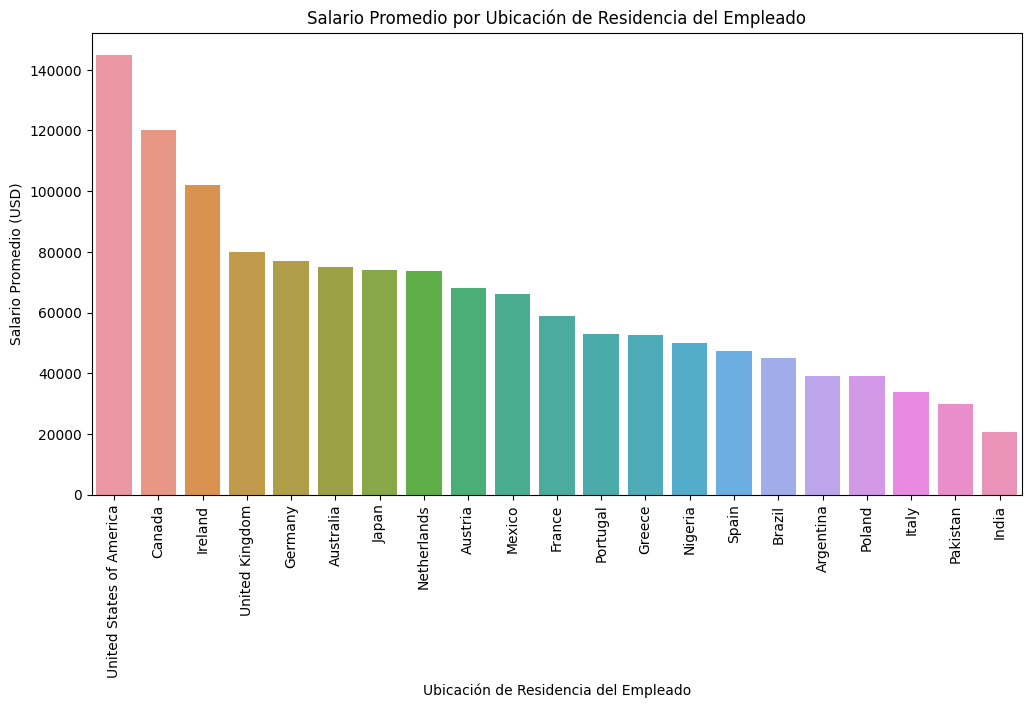

In [68]:


# Filtramos las ubicaciones de residencia con una cantidad de empleados mayor a 5
residencias_filtradas = data_residencia[data_residencia["cantidad_de_datos"] > 5].index

# Filtramos el DataFrame original por las ubicaciones de residencia seleccionadas
df_filtrado = df[df["employee_residence_c"].isin(residencias_filtradas)]

# Calculamos el salario promedio por ubicación de residencia solo para las ubicaciones seleccionadas
salario_promedio_por_residencia = df_filtrado.groupby("employee_residence_c")["salary_in_usd"].median().reset_index()

# Ordenar las ubicaciones de residencia por salario promedio de manera descendente
salario_promedio_por_residencia = salario_promedio_por_residencia.sort_values("salary_in_usd", ascending=False)

print(salario_promedio_por_residencia)

#gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x="employee_residence_c", y="salary_in_usd", data=salario_promedio_por_residencia)
plt.xlabel("Ubicación de Residencia del Empleado")
plt.ylabel("Salario Promedio (USD)")
plt.title("Salario Promedio por Ubicación de Residencia del Empleado")
plt.xticks(rotation=90)
plt.show()


## 5. Correlaciones

In [71]:

# Se define una lista de columnas numéricas (num_cols) y una lista de columnas categóricas (cat_cols) que se quieren transformar.

num_cols = ['work_year', 'salary_in_usd']
cat_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence_c', 'company_location_c', 'company_size', 'remote_ratio']

encoder = OrdinalEncoder()
cat_cols_en = encoder.fit_transform(df[cat_cols])
cat_cols_en = pd.DataFrame(data=cat_cols_en, columns=cat_cols)
nuevo_df = df[num_cols].join(cat_cols_en)
nuevo_df.head()

,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence_c,company_location_c,company_size,remote_ratio
0,2023,85847,3.0,2.0,84.0,66.0,62.0,0.0,2.0
1,2023,30000,2.0,0.0,66.0,75.0,70.0,2.0,2.0
2,2023,25500,2.0,0.0,66.0,75.0,70.0,2.0,2.0
3,2023,175000,3.0,2.0,47.0,11.0,12.0,1.0,2.0
4,2023,120000,3.0,2.0,47.0,11.0,12.0,1.0,2.0


In [72]:
corr_matrix = nuevo_df.corr(method='spearman')
corr_matrix


,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence_c,company_location_c,company_size,remote_ratio
work_year,1.000000,0.210749,0.158267,-0.010722,-0.022782,0.253402,0.237393,0.142470,-0.122469
salary_in_usd,0.210749,1.000000,0.375241,-0.009378,0.152563,0.488665,0.478019,0.015739,0.047792
experience_level,0.158267,0.375241,1.000000,-0.034185,0.025370,0.322788,0.312936,0.072653,0.063739
employment_type,-0.010722,-0.009378,-0.034185,1.000000,-0.044955,-0.025995,-0.024667,-0.035615,-0.027795
job_title,-0.022782,0.152563,0.025370,-0.044955,1.000000,-0.072470,-0.081129,-0.010304,-0.059490
employee_residence_c,0.253402,0.488665,0.322788,-0.025995,-0.072470,1.000000,0.952139,0.059659,0.068753
company_location_c,0.237393,0.478019,0.312936,-0.024667,-0.081129,0.952139,1.000000,0.078840,0.082396
company_size,0.142470,0.015739,0.072653,-0.035615,-0.010304,0.059659,0.078840,1.000000,0.052993
remote_ratio,-0.122469,0.047792,0.063739,-0.027795,-0.059490,0.068753,0.082396,0.052993,1.000000


In [73]:

# Obtener las coordenadas de las correlaciones mayores a 0.81 y diferentes a 1
filas, columnas = np.where((corr_matrix > 0.81) & (corr_matrix < 1))

# Verificar si existen correlaciones mayores a 0.81 y diferentes a 1
if len(filas) > 0:
    for fila, columna in zip(filas, columnas):
        # Imprimir los pares de fila y columna con correlación mayor a 0.81 y diferente a 1
        print("Fila:", corr_matrix.index[fila], "- Columna:", corr_matrix.columns[columna])
else:
    print("No existen correlaciones mayores a 0.81 y diferentes a 1.")


Fila: employee_residence_c - Columna: company_location_c
Fila: company_location_c - Columna: employee_residence_c


In [74]:

# Seleccionamos las dos columnas específicas que queremos correlacionar
variables_a = df['employee_residence_c']
variables_b = df['company_location_c']

# Calculamos el coeficiente de correlación de Spearman y el valor p
correlation, p_value = spearmanr(variables_a, variables_b)

# Imprimimos el coeficiente de correlación y el valor p
print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

# Verificamos si la correlación es estadísticamente significativa
if p_value < 0.05:
    print("La correlación es estadísticamente significativa.")
else:
    print("No hay suficiente evidencia para afirmar que la correlación es significativa.")


Coeficiente de correlación de Spearman: 0.9521385973056874
Valor p: 0.0
La correlación es estadísticamente significativa.


In [75]:
analisis_cantidad_y_porcentaje(df,"reside_en_mismo_pais")


,cantidad_de_datos,porcentaje_de_datos
Sí,3659,97.443409
No,96,2.556591


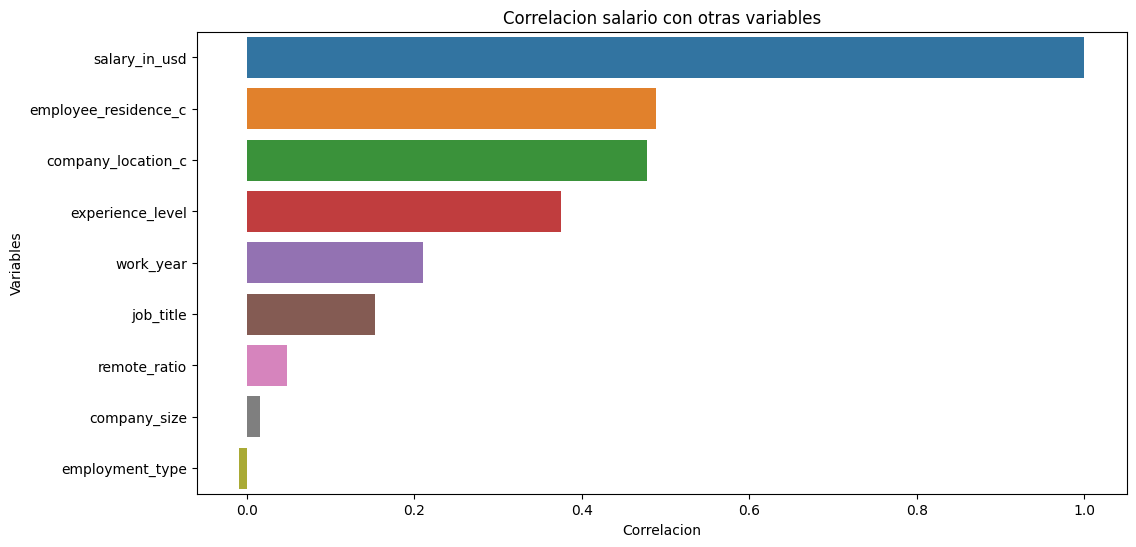

In [76]:
corre_salario_variables = corr_matrix['salary_in_usd'].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=corre_salario_variables.values, y=corre_salario_variables.index, orient='h')
plt.title('Correlacion salario con otras variables')
plt.xlabel('Correlacion')
plt.ylabel('Variables')
plt.show()

## 6 Test Hipotesis

In [93]:
def chequeo_test_variables(df, variable, categoria):

        """
        Esta función realiza pruebas de hipótesis para determinar si los salarios ajustados por inflación para una categoría específica de una variable dada han experimentado un aumento significativo en diferentes años.

        Parámetros:
        - df: DataFrame que contiene los datos para el análisis.
        - variable: Nombre de la variable cuya categoría se analizará.
        - categoria: Categoría específica de la variable para la cual se realizará el análisis.

        Descripción:
        La función toma como entrada un DataFrame "df", el nombre de una variable "variable" y una categoría específica "categoria". Luego, filtra los datos para obtener los salarios ajustados por inflación
        correspondientes a la categoría dada en diferentes años (2020, 2021, 2022 y 2023). A continuación, utiliza la prueba estadística de Mann-Whitney U para comparar los salarios en pares de 
        años consecutivos (2020-2021, 2021-2022 y 2022-2023). 

        La función imprime los resultados de las pruebas de hipótesis para cada par de años, incluyendo el aumento o no del salario ajustado entre los años, y el valor de p-valor asociado a la prueba. 
        Si el p-valor es menor que 0.05 para todos los pares de años, se considera que el salario ajustado ha experimentado un aumento significativo en todos esos años.

        Retorno:
        La función no tiene valor de retorno explícito, ya que su objetivo principal es imprimir los resultados de las pruebas de hipótesis para el análisis.
        """



        print(f"Categoría: {categoria}")
    
        anio1 = 2020
        anio2 = 2021
        anio3 = 2022
        anio4 = 2023
        
        salarios_anio1 = df[(df['work_year'] == anio1) & (df[variable] == categoria)]['salary_in_usd']
        salarios_anio2 = df[(df['work_year'] == anio2) & (df[variable] == categoria)]['salary_in_usd']
        salarios_anio3 = df[(df['work_year'] == anio3) & (df[variable] == categoria)]['salary_in_usd']
        salarios_anio4 = df[(df['work_year'] == anio4) & (df[variable] == categoria)]['salary_in_usd']
        
        resultado_1_2 = mannwhitneyu(salarios_anio1, salarios_anio2, alternative='less')
        resultado_2_3 = mannwhitneyu(salarios_anio2, salarios_anio3, alternative='less')
        resultado_3_4 = mannwhitneyu(salarios_anio3, salarios_anio4, alternative='less')
        
        p_value_1_2 = resultado_1_2.pvalue
        p_value_2_3 = resultado_2_3.pvalue
        p_value_3_4 = resultado_3_4.pvalue
        
        if p_value_1_2 < 0.05 and p_value_2_3 < 0.05 and p_value_3_4 < 0.05:
            aumento = "Aumentó"
        else:
            aumento = "No aumentó"
        
        print(f"{anio1} - {anio2}: {aumento} (p-valor: {p_value_1_2:.6f})")
        print(f"{anio2} - {anio3}: {aumento} (p-valor: {p_value_2_3:.6f})")
        print(f"{anio3} - {anio4}: {aumento} (p-valor: {p_value_3_4:.6f})")



In [78]:
#probamos la funcion con company_size, L - employment_type, Full-time y remote_ratio, remote
#graficamente podemos observar que estas categorias de las variables parecian aumentar.

chequeo_test_variables(df, 'company_size', 'L')
chequeo_test_variables(df, 'experience_level', 'Senior')
chequeo_test_variables(df, 'employment_type', 'Full-time')
chequeo_test_variables(df, 'remote_ratio', 'in company')


Categoría: L
2020 - 2021: No aumentó (p-valor: 0.231907)
2021 - 2022: No aumentó (p-valor: 0.013920)
2022 - 2023: No aumentó (p-valor: 0.249494)
Categoría: Senior
2020 - 2021: No aumentó (p-valor: 0.517883)
2021 - 2022: No aumentó (p-valor: 0.001115)
2022 - 2023: No aumentó (p-valor: 0.000008)
Categoría: Full-time
2020 - 2021: No aumentó (p-valor: 0.196211)
2021 - 2022: No aumentó (p-valor: 0.000000)
2022 - 2023: No aumentó (p-valor: 0.000000)
Categoría: in company
2020 - 2021: No aumentó (p-valor: 0.305168)
2021 - 2022: No aumentó (p-valor: 0.000039)
2022 - 2023: No aumentó (p-valor: 0.000000)


In [80]:
# realizamos la prueba de mannwhitneyu para comparar entre los promedios de salarios de cada año para entender si hay cambios significativos entre las medianas.


años = [2020, 2021, 2022, 2023]

for i in range(len(años)):
    for j in range(i+1, len(años)):
        salarios_i = df[df['work_year'] == años[i]]['salary_in_usd']
        salarios_j = df[df['work_year'] == años[j]]['salary_in_usd']
        
        # Realizando la prueba
        stat, p = mannwhitneyu(salarios_i, salarios_j)

        print(f"\nComparando {años[i]} vs. {años[j]}:")
        print(f'Estadístico U: {stat}')
        print(f'P-valor: {p}')

        if p < 0.05:
            print(f"Hay una diferencia significativa en los salarios medianos entre {años[i]} y {años[j]}.")
        else:
            print(f"No hay una diferencia significativa en los salarios medianos entre {años[i]} y {años[j]}.")


Comparando 2020 vs. 2021:
Estadístico U: 8209.5
P-valor: 0.4280231574809945
No hay una diferencia significativa en los salarios medianos entre 2020 y 2021.

Comparando 2020 vs. 2022:
Estadístico U: 33767.5
P-valor: 6.025012409530372e-12
Hay una diferencia significativa en los salarios medianos entre 2020 y 2022.

Comparando 2020 vs. 2023:
Estadístico U: 29304.5
P-valor: 4.566932933971625e-17
Hay una diferencia significativa en los salarios medianos entre 2020 y 2023.

Comparando 2021 vs. 2022:
Estadístico U: 115712.0
P-valor: 2.218674604780811e-22
Hay una diferencia significativa en los salarios medianos entre 2021 y 2022.

Comparando 2021 vs. 2023:
Estadístico U: 102080.0
P-valor: 1.8807969501872277e-35
Hay una diferencia significativa en los salarios medianos entre 2021 y 2023.

Comparando 2022 vs. 2023:
Estadístico U: 1284615.5
P-valor: 6.8025943406674116e-12
Hay una diferencia significativa en los salarios medianos entre 2022 y 2023.


In [81]:
# Contar la cantidad total de trabajos por año
total_por_año = df.groupby('work_year').size()

# Contar cuántos trabajos remotos hay por año
remotos_por_año = df[df['remote_ratio'] == 'remote'].groupby('work_year').size()

# Calcular el % de trabajos remotos por año
porcentaje_remotos = (remotos_por_año / total_por_año) * 100

print(porcentaje_remotos)



work_year
2020    51.315789
2021    52.173913
2022    53.545673
2023    33.221289
dtype: float64


In [82]:
# Realizamos el test de mannwhitneyu para ver si hay cambios significativos entre las medianas del % de trabajo remoto.

años = [2020, 2021, 2022, 2023]

for i in range(len(años)):
    for j in range(i+1, len(años)):
        ratio_i = df[df['work_year'] == años[i]]['remote_ratio'].apply(lambda x: 1 if x == 'remote' else 0)
        ratio_j = df[df['work_year'] == años[j]]['remote_ratio'].apply(lambda x: 1 if x == 'remote' else 0)
        
        # Realizando la prueba
        stat, p = mannwhitneyu(ratio_i, ratio_j, alternative = "less")

        print(f"\nComparando {años[i]} vs. {años[j]}:")
        print(f'Estadístico U: {stat}')
        print(f'P-valor: {p}')

        if p < 0.05:
            print(f"Hay una diferencia significativa en el ratio de trabajos remotos entre {años[i]} y {años[j]}.")
        else:
            print(f"No hay una diferencia significativa en el ratio de trabajos remotos entre {años[i]} y {años[j]}.")


Comparando 2020 vs. 2021:
Estadístico U: 8665.0
P-valor: 0.4487823086261842
No hay una diferencia significativa en el ratio de trabajos remotos entre 2020 y 2021.

Comparando 2020 vs. 2022:
Estadístico U: 61822.0
P-valor: 0.35164964231620055
No hay una diferencia significativa en el ratio de trabajos remotos entre 2020 y 2022.

Comparando 2020 vs. 2023:
Estadístico U: 80103.5
P-valor: 0.9994458017558103
No hay una diferencia significativa en el ratio de trabajos remotos entre 2020 y 2023.

Comparando 2021 vs. 2022:
Estadístico U: 188735.0
P-valor: 0.3480055224175624
No hay una diferencia significativa en el ratio de trabajos remotos entre 2021 y 2022.

Comparando 2021 vs. 2023:
Estadístico U: 244180.0
P-valor: 0.9999999922693865
No hay una diferencia significativa en el ratio de trabajos remotos entre 2021 y 2023.

Comparando 2022 vs. 2023:
Estadístico U: 1786961.5
P-valor: 1.0
No hay una diferencia significativa en el ratio de trabajos remotos entre 2022 y 2023.


Basandonos en nuestro análisis y las pruebas de Mann-Whitney U realizadas, podemos arrojar luz sobre las hipótesis iniciales:
Sobre los salarios medianos en Ciencia de Datos:
Nuestras hipótesis iniciales no han sido plenamente corroboradas. Si bien entre los años 2021 y 2023 observamos cambios significativos en las medianas salariales, esta tendencia no se evidenció entre 2020 y 2021. Sin embargo, al analizar el comportamiento en los años subsiguientes, es indudable que el salario en el campo de la Ciencia de Datos ha mostrado un incremento notable, validando, en parte, nuestra suposición inicial.
Respecto al trabajo remoto:
Contrario a lo que podríamos haber esperado, el trabajo remoto no ha experimentado un incremento año tras año. Durante los primeros tres años del análisis, la proporción de trabajos remotos se mantuvo estable. No obstante, en 2023 experimentamos una caída significativa en el porcentaje de trabajos remotos, en contraste con las posiciones in situ o in company. Esta tendencia puede estar influenciada, en gran medida, por el cierre de la fase más crítica de la pandemia, llevando a las empresas y empleados a retornar a esquemas de trabajo más tradicionales o presenciales.
En resumen, las dinámicas laborales y salariales en el ámbito de la Ciencia de Datos han demostrado ser susceptibles a diversos factores, incluyendo, pero no limitado a, contextos globales como una pandemia. Estos hallazgos nos proporcionan una visión más clara y matizada del mercado laboral en esta área durante el período de 2020 a 2023.

In [ ]:
df.to_csv('eda_salarios.csv', index=False)